# Matriz de rigidez de una viga de Bernoulli-Euler

_Análisis de Estructuras. Grado en Ingeniería Civil._ 

Autor:

- Alejandro E. Martínez-Castro.
- Departamento de Mecánica de Estructuras e Ingeniería Hidráulica. Universidad de Granada.

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Matriz de rigidez de viga de Bernoulli-Euler</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Alejandro Martínez Castro</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Reconocimiento-NoComercial-CompartirIgual 4.0 Internacional License</a>.

## Objetivos del cuaderno

En este cuaderno se va a obtener la matriz de rigidez para los términos de flexión de una viga de Bernoulli-Euler. La matriz se va a obtener a partir de la definición vista en clase. Esto permite explorar los siguientes objetivos: 

- Generación de las funciones cúbicas, soluciones a problemas de flexión de vigas con cargas en los extremos (funciones de Hermite). 
- Introducción de la metodología general para obtener las denominadas "funciones de forma", que más adelante se emplearán en el Método de los Elementos Finitos. 
- Determinación de los términos de las columnas de la matriz de rigidez mediante la evaluación directa de los esfuerzos cortante y flector en los extremos, y sus relaciones con las fuerzas y momentos en los extremos de barra.

En primer lugar, cargaremos el paquete SymPy, para poder realizar cálculos simbólicos

In [1]:
from sympy import init_session
init_session()

IPython console for SymPy 1.9 (Python 3.8.12-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



## Definición de matrices de base polinómica y su primera derivada

A continuación definiremos el símbolo para la longitud $L$, y definiremos la base de los polinomios cúbicos sobre la que se interpolará la solución.

In [2]:
L = symbols('L')
base = Matrix([[1,x,x**2,x**3]])
base

Definamos igualmente una lista con la derivada primera de estas funciones de base, pues necesitaremos imponer condiciones en giros:

In [3]:
deribase = diff(base,x)
deribase

## Construcción de la matriz de aplicaciones lineales asociadas a evaluar en los extremos del elemento viga.

A continuación, construiremos la matriz asociada a cuatro aplicaciones lineales (por filas). En cada fila, se construirán las siguientes matrices: 
- En la primera fila, la aplicación para evaluar en el origen, $x=0$.
- En la segunda fila, la aplicación para evaluar la primera derivada en el origen $x=0$. 
- En la tercera fila, la aplicación para evaluar la función en $x=L$. 
- En la cuarta fila, la aplicación para evaluar la derivada de la función en $x=L$. 

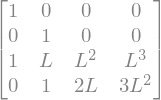

In [4]:
matM = Matrix.vstack(base.subs(x, 0), 
                     deribase.subs(x, 0), 
                     base.subs(x, L),
                     deribase.subs(x, L))
matM

Según se vio en la teoría, la inversa de esta matriz, por columnas, contiene los cuatro coeficientes que multiplicarán a la base $[1,x,x^2,x^3]$ para construir las cuatro funciones $h1(x), h2(x), h3(x), h4(x)$. 

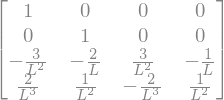

In [5]:
Inv_matM = matM.inv()
Inv_matM

## Construcción de las funciones de forma

Finalmente, se construyen las cuatro funciones cúbicas $hi(x)$ (también llamadas "polinomios de Hermite"), que representan las cuatro soluciones a una viga de Bernoulli-Euler, que incluyen un desplazamiento unidad según el grado de libertad $i$, manteniendo el resto de grados de libertado con valor nulo. 

In [6]:
h1 = base.dot(Inv_matM.col(0))
h2 = base.dot(Inv_matM.col(1))
h3 = base.dot(Inv_matM.col(2))
h4 = base.dot(Inv_matM.col(3))

Veamos una de ellas:

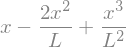

In [7]:
h2

## Definición de las funciones "esfuerzo cortante" y "momento flector"

A continuación se definen las funciones que permiten obtener el esfuerzo cortante $\mathcal{V}(x)$ y el momento flector $\mathcal{M}(x)$. Estas funciones pueden construirse a partir de la solución para el desplazamiento $y(x)$, como: 

\begin{eqnarray}
\mathcal{V}(x) & = & - EI\,y'''(x) \\
\mathcal{M}(x) & = & EI\,y''(x)
\end{eqnarray}

Nótese que estas funciones tienen signo. En clase se vio el criterio de signos positivo. 

In [8]:
EI = symbols('EI')
def cortante(f):
    return -EI*diff(f,x,3)

def flector(f):
    return EI*diff(f,x,2)

Podemos probar estas funciones. Por ejemplo, el momento flector en $x=0$ correspondiente a la función de desplazamiento $h1(x)$ es: 

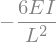

In [9]:
flector(h1).subs(x,0)

## Construcción de la matriz de rigidez. 

La columna $j$ de la matriz de rigidez, con $j\in[1,4]$ tiene 4 términos. En los cuatro términos de las filas, se ubican las fuerzas y momentos, según el criterio de signos para fuerzas en extremos de barras (no confundir con los signos para los momentos), que deben aplicarse para que la función de desplazamiento sea $hj(x)$. 


<img src="signosBE.png" width="500" >

Sus relaciones con las fuerzas y momentos en los extremos de barra, $F_i, M_i, F_j, M_j$, son las siguientes:

\begin{eqnarray}
F_i & = & - \mathcal{V}(0) \\
M_i & = & - \mathcal{M}(0) \\
F_j & = & \mathcal{V}(L) \\
M_j & = & \mathcal{M}(L)
\end{eqnarray}

Considerando estas relaciones, podemos construir la matriz de rigidez, evaluando en los extremos según la relación anterior, y teniendo en cuenta las soluciones ya calculadas para las funciones $h1(x), h2(x), h3(x), h4(x)$. 

Definamos una función que nos devolverá la columna correspondiente a la matriz de rigidez, dada una función de desplazamiento genérica:

In [10]:
def columna(f):
    return Matrix([[-cortante(f).subs(x,0)],
                   [-flector(f).subs(x,0)],
                   [cortante(f).subs(x,L)],
                   [flector(f).subs(x,L)]])

Veamos cómo funciona con una de las funciones polinómicas de Hermite: 

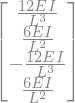

In [11]:
columna(h1)

Para construir la matriz de rigidez, simplemente "apilamos" las cuatro columnas, construidas consecutivamente para las cuatro funciones de Hermite: 

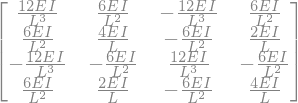

In [12]:
matriz_rigidez = Matrix.hstack(columna(h1),columna(h2),columna(h3),columna(h4))
matriz_rigidez
                     